In [1]:
print('Elllooooo')


Elllooooo


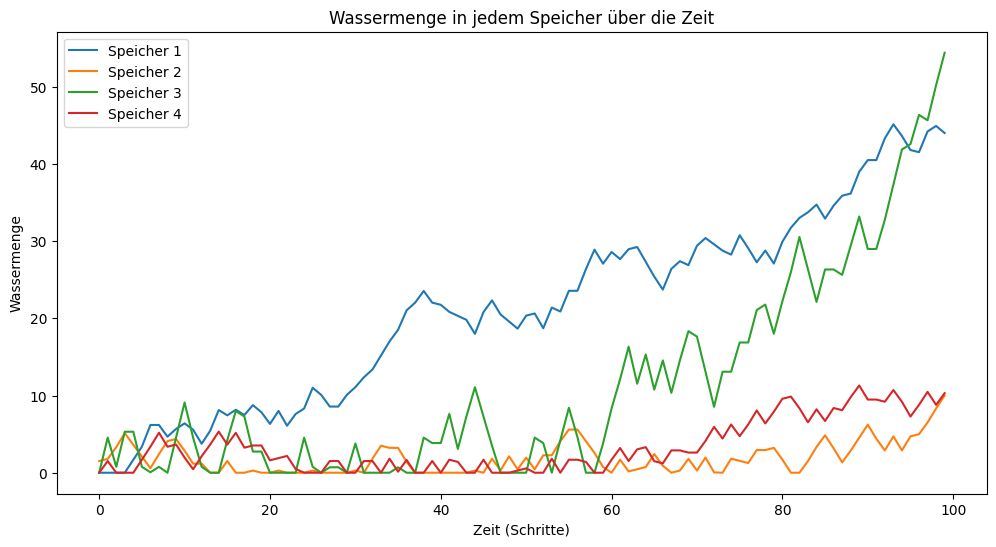

In [2]:
import matplotlib.pyplot as plt
import math
import random

class Wasserspeicher:
    def __init__(self, todzeit, max_kapazität, grundverlust, grundverbrauch):
        self.todzeit = todzeit
        self.max_kapazität = max_kapazität
        self.grundverlust = grundverlust
        self.grundverbrauch = grundverbrauch
        self.aktuelle_menge = 0

    def sinus_verlust(self, zeit):
        # Sinusförmiger Verlust über die Zeit
        return self.grundverlust * math.sin(random.randrange(-5,5))

    def sinus_verbrauch(self, zeit):
        # Sinusförmiger Verbrauch über die Zeit
        return self.grundverbrauch * math.sin(random.randrange(-5,5))

    def update(self, zeit, eingehende_menge):
        # Aktualisieren Sie den Verlust und Verbrauch basierend auf der Sinusfunktion
        self.verlust = self.sinus_verlust(zeit)
        self.verbrauch = self.sinus_verbrauch(zeit)

        self.aktuelle_menge += eingehende_menge
        self.aktuelle_menge -= self.verbrauch
        self.aktuelle_menge *= (1 - self.verlust)
        if self.aktuelle_menge < 0:
            self.aktuelle_menge = 0

        if self.aktuelle_menge > self.max_kapazität:
            ueberschuss = self.aktuelle_menge - self.max_kapazität
            self.aktuelle_menge = self.max_kapazität
            return ueberschuss
        return 0

class WasserspeicherSystem:
    def __init__(self):
        self.speicher = []

    def hinzufuegen_speicher(self, speicher):
        self.speicher.append(speicher)

    def simulate(self, schritte, eingehende_menge_pro_schritt):
        historie = [[] for _ in self.speicher]

        for zeit in range(schritte):
            eingehende_menge = random.randrange(0,2)

            for speicher in self.speicher:
                ueberschuss = speicher.update(zeit, eingehende_menge)
                eingehende_menge = ueberschuss

            for i, speicher in enumerate(self.speicher):
                historie[i].append(speicher.aktuelle_menge)

        return historie

# Erstellen Sie das System und fügen Sie Speicher hinzu
system = WasserspeicherSystem()
system.hinzufuegen_speicher(Wasserspeicher(todzeit=1, max_kapazität=1000, grundverlust=0.0, grundverbrauch=2))
system.hinzufuegen_speicher(Wasserspeicher(todzeit=1, max_kapazität=1000, grundverlust=0.0, grundverbrauch=2))
system.hinzufuegen_speicher(Wasserspeicher(todzeit=1, max_kapazität=1000, grundverlust=0.0, grundverbrauch=5))
system.hinzufuegen_speicher(Wasserspeicher(todzeit=1, max_kapazität=1000, grundverlust=0.0, grundverbrauch=2))
# Sie können hier weitere Speicher hinzufügen

# Simulieren Sie das System
schritte = 100
eingehende_menge_pro_schritt = 8
historie = system.simulate(schritte, eingehende_menge_pro_schritt)

# Plotten Sie die Ergebnisse
plt.figure(figsize=(12, 6))
for i, speicher_historie in enumerate(historie):
    plt.plot(speicher_historie, label=f"Speicher {i+1}")
plt.title("Wassermenge in jedem Speicher über die Zeit")
plt.xlabel("Zeit (Schritte)")
plt.ylabel("Wassermenge")
plt.legend()
plt.show()


# Header1
## Header2
**Bold Text**


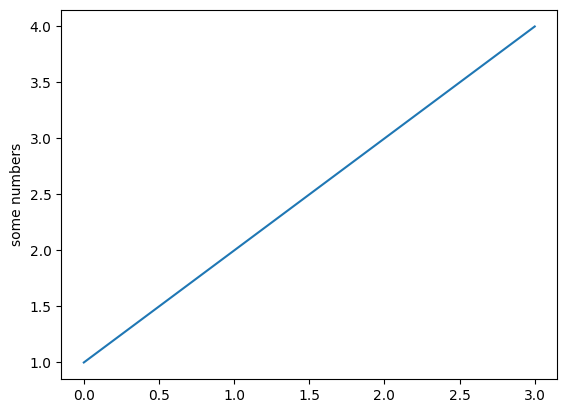

In [3]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [4]:
import requests
from requests.exceptions import HTTPError

for url in [ 'https://api.dzb-projects.ch/api/Test/TestDataSeries']: # 'https://api.dzb-projects.ch/api/Test', 'https://api.dzb-projects.ch/api/Test/TestDB',
    try:
        s = requests.Session()
        s.mount('http://', requests.adapters.HTTPAdapter(max_retries=1000))
        response = s.get(url)

        # If the response was successful, no Exception will be raised
        response.raise_for_status()
    except HTTPError as http_err:
        print(f'HTTP error occurred: {http_err}')  # Python 3.6
    except Exception as err:
        print(f'Other error occurred: {err}')  # Python 3.6
    else:
        print(response.text)
        jsonResponse = response.json()
        print(jsonResponse)




[{"date":"0001-01-01T00:00:00","temperature":29,"humidity":61,"pressure":972,"illuminance":614,"uva":428,"uvb":553,"uviNdex":869,"batteryLevel":68,"deviceId":1},{"date":"2023-01-17T02:15:02.3337556","temperature":40,"humidity":43,"pressure":1002,"illuminance":57,"uva":1231,"uvb":1209,"uviNdex":1745,"batteryLevel":null,"deviceId":1},{"date":"2023-01-17T02:20:02.3337556","temperature":-12,"humidity":38,"pressure":1367,"illuminance":1021,"uva":430,"uvb":494,"uviNdex":516,"batteryLevel":null,"deviceId":1},{"date":"2023-01-17T02:25:02.3337556","temperature":5,"humidity":91,"pressure":1161,"illuminance":2114,"uva":1852,"uvb":1630,"uviNdex":629,"batteryLevel":null,"deviceId":1},{"date":"2023-01-17T02:30:02.3337556","temperature":-1,"humidity":85,"pressure":821,"illuminance":24,"uva":186,"uvb":1187,"uviNdex":1273,"batteryLevel":null,"deviceId":1},{"date":"2023-01-17T02:35:02.3337556","temperature":28,"humidity":4,"pressure":1051,"illuminance":1391,"uva":414,"uvb":1246,"uviNdex":402,"batteryLev

### Expected response:
{
    "date": "2023-01-17T02:15:02.3337556",
    "temperature": 40,
    "humidity": 43,
    "pressure": 1002,
    "illuminance": 57,
    "uva": 1231,
    "uvb": 1209,
    "uviNdex": 1745,
    "batteryLevel": null,
    "deviceId": 1
  }